In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
url ="https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv"
df= pd.read_csv(url)

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [11]:
df['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [12]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
df.shape

(891, 12)

In [14]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
df.sort_values(['Sex'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
383,384,1,1,"Holverson, Mrs. Alexander Oskar (Mary Aline To...",female,35.0,1,0,113789,52.0000,NaN,S
218,219,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C
609,610,1,1,"Shutes, Miss. Elizabeth W",female,40.0,0,0,PC 17582,153.4625,C125,S
216,217,1,3,"Honkanen, Miss. Eliina",female,27.0,0,0,STON/O2. 3101283,7.9250,NaN,S
215,216,1,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,D36,C
...,...,...,...,...,...,...,...,...,...,...,...,...
371,372,0,3,"Wiklund, Mr. Jakob Alfred",male,18.0,1,0,3101267,6.4958,NaN,S
372,373,0,3,"Beavan, Mr. William Thomas",male,19.0,0,0,323951,8.0500,NaN,S
373,374,0,1,"Ringhini, Mr. Sante",male,22.0,0,0,PC 17760,135.6333,NaN,C
360,361,0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.9000,NaN,S


In [17]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Numeric columns are selected

In [18]:
cols_to_check = ['Age', 'Fare', 'SibSp', 'Parch']

In [19]:
df_clean = df[cols_to_check].dropna()

## Check for Outliers

In [20]:
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] < lower) | (data[column] > upper)]


In [21]:
for col in cols_to_check:
    outliers = find_outliers_iqr(df_clean, col)
    print(f"\n Outliers in '{col}' ({len(outliers)} rows):")
    print(outliers[[col]].head(10))  # print top 10 for readability


 Outliers in 'Age' (11 rows):
      Age
33   66.0
54   65.0
96   71.0
116  70.5
280  65.0
456  65.0
493  71.0
630  80.0
672  70.0
745  70.0

 Outliers in 'Fare' (94 rows):
         Fare
27   263.0000
34    82.1708
52    76.7292
61    80.0000
62    83.4750
72    73.5000
88   263.0000
102   77.2875
118  247.5208
120   73.5000

 Outliers in 'SibSp' (35 rows):
    SibSp
7       3
16      4
24      3
27      3
50      4
59      5
63      3
68      4
71      5
85      3

 Outliers in 'Parch' (15 rows):
     Parch
13       5
25       5
86       3
167      4
360      4
437      3
438      4
567      4
610      5
638      5


In [22]:
df_no_outliers = df.copy()
for col in cols_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower) & (df_no_outliers[col] <= upper) | df_no_outliers[col].isnull()]


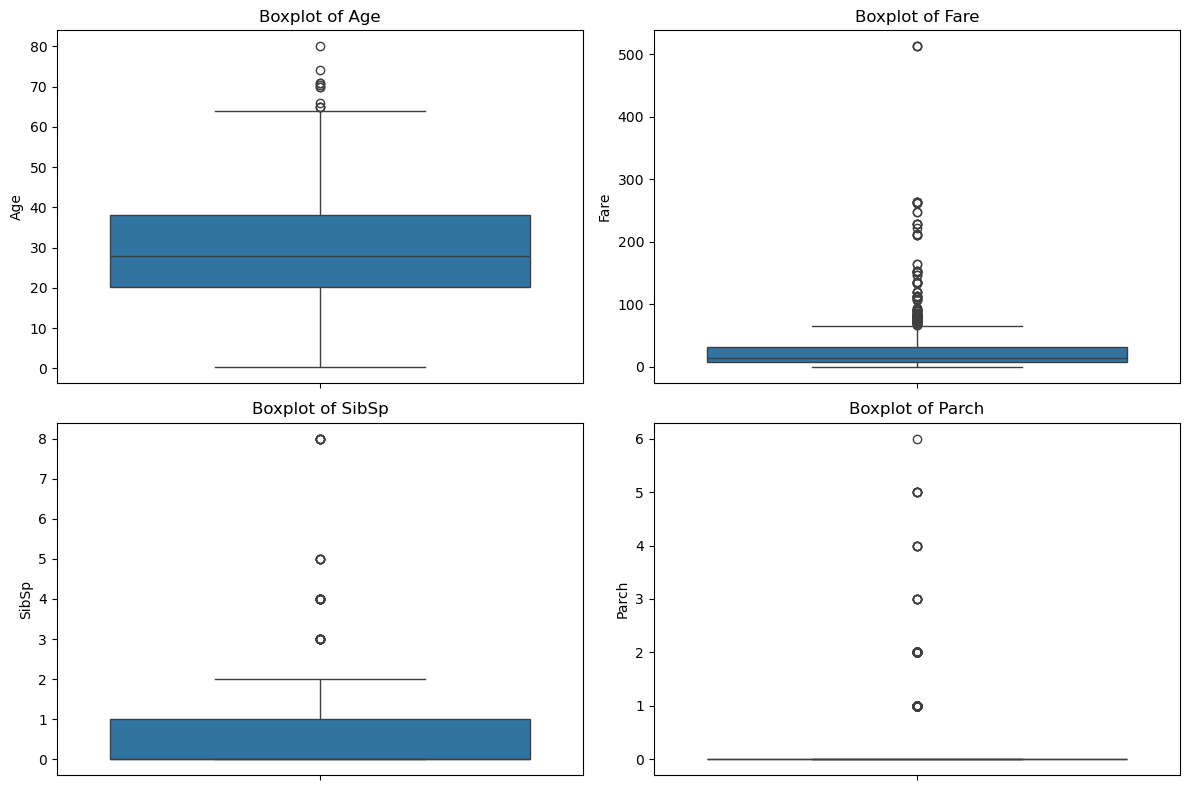

In [27]:
cols_to_plot = ['Age', 'Fare', 'SibSp', 'Parch']
plt.figure(figsize=(12, 8))
for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(2, 2, i)
    sn.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

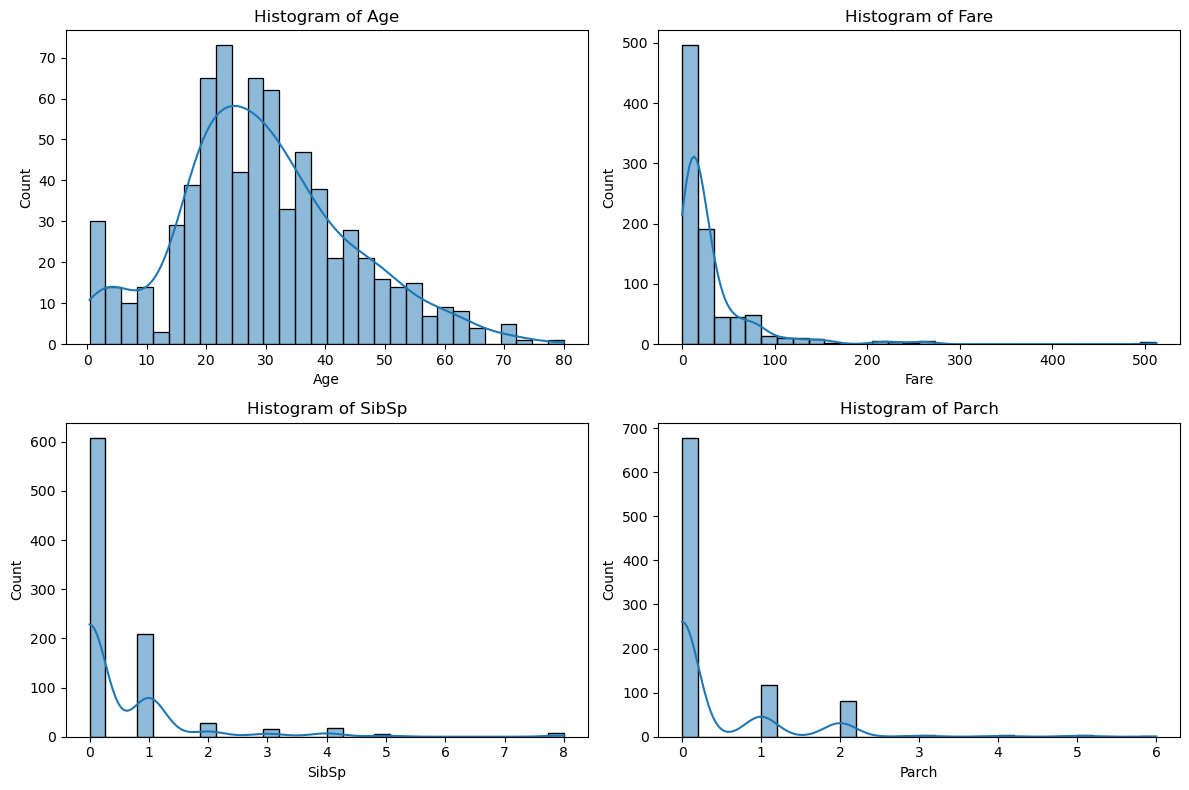

In [29]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(2, 2, i)
    sn.histplot(df[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    plt.tight_layout()

plt.show()


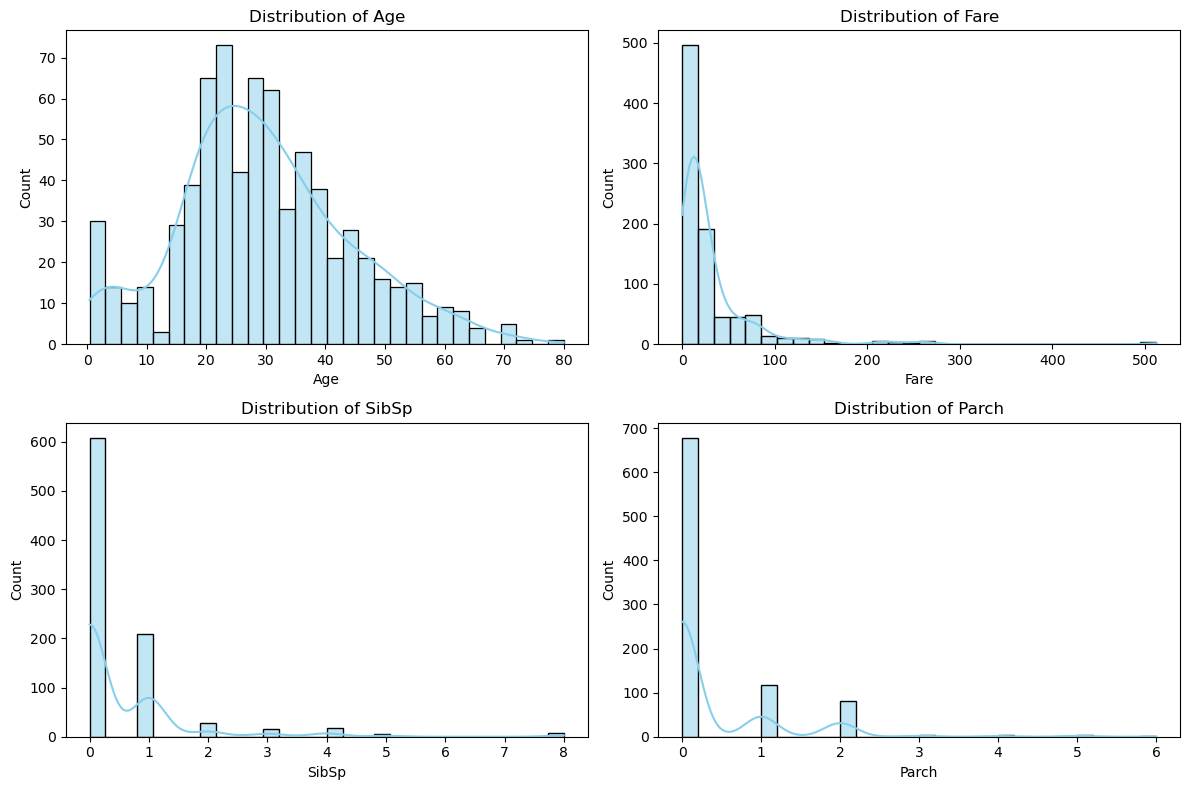

In [31]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(['Age', 'Fare', 'SibSp', 'Parch'], 1):
    plt.subplot(2, 2, i)
    sn.histplot(df[col].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()


# Age vs Survived

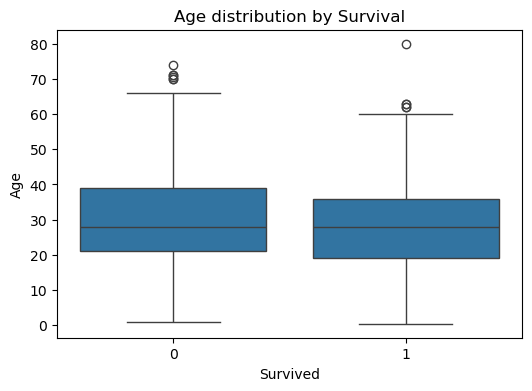

In [33]:
plt.figure(figsize=(6, 4))
sn.boxplot(x='Survived', y='Age', data=df)
plt.title('Age distribution by Survival')
plt.show()

# Fare Vs Pclass

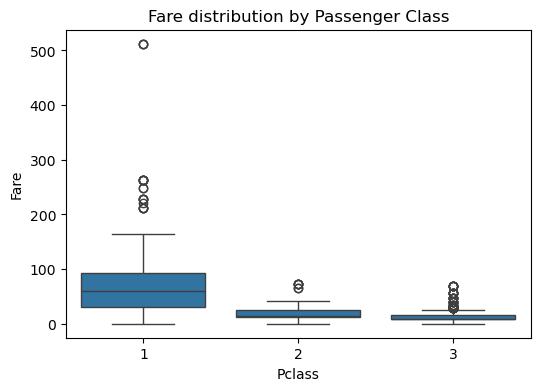

In [35]:
plt.figure(figsize=(6, 4))
sn.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare distribution by Passenger Class')
plt.show()


# Age Vs Pclass

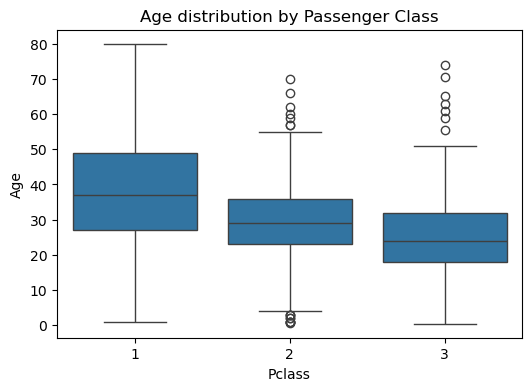

In [36]:
plt.figure(figsize=(6, 4))
sn.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age distribution by Passenger Class')
plt.show()

# Correlation among numeric variables

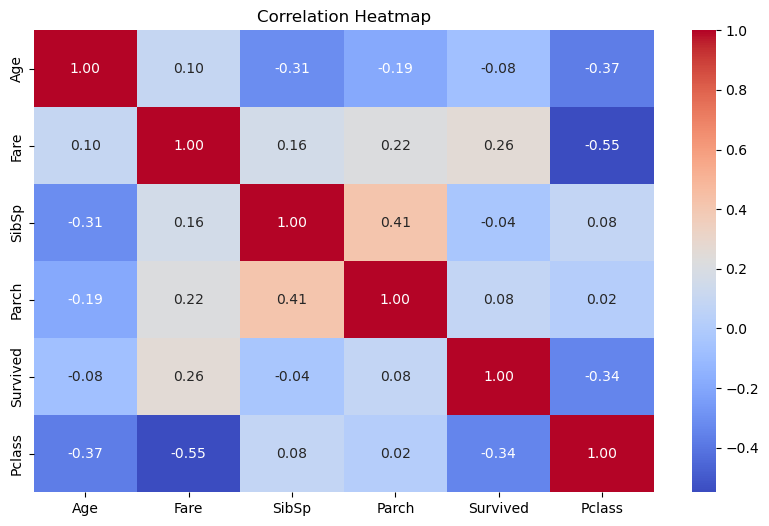

In [38]:
plt.figure(figsize=(10, 6))
corr = df[['Age', 'Fare', 'SibSp', 'Parch', 'Survived', 'Pclass']].corr()
sn.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

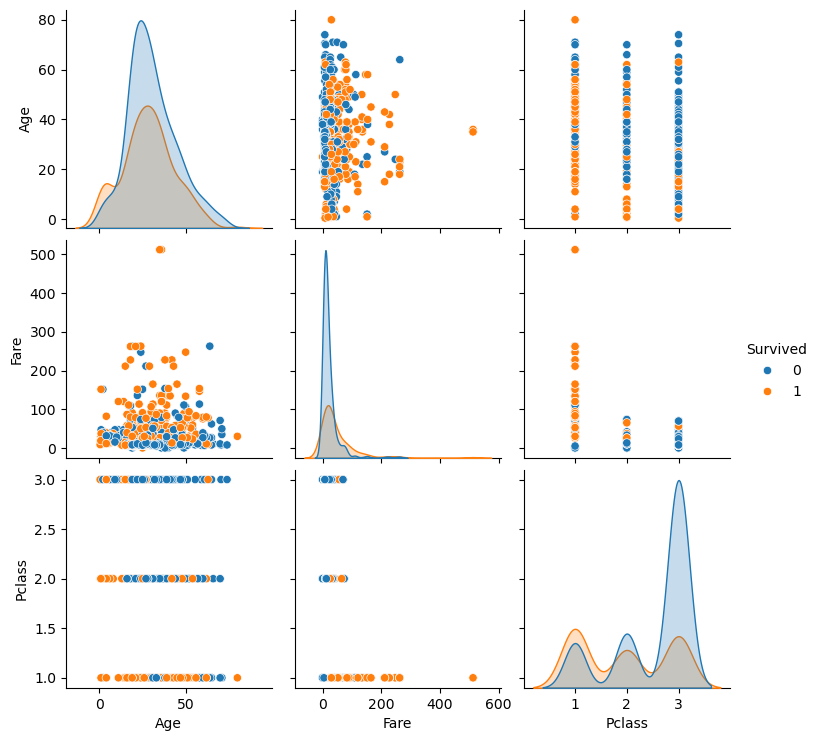

In [39]:
sn.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived')


In [40]:
features = ['Age', 'Fare', 'SibSp', 'Parch', 'Pclass']
df_numeric = df[features].copy()

In [41]:
df_numeric = df_numeric.fillna(df_numeric.median())

In [45]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

In [46]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

In [47]:
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Survived'] = df['Survived']  # Add Survived for colorin

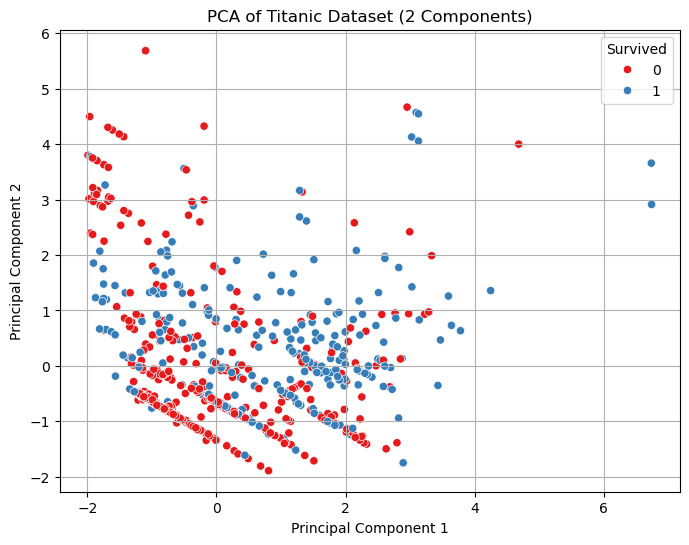

In [60]:
plt.figure(figsize=(8, 6))
sn.scatterplot(x='PC1', y='PC2', hue='Survived', palette='Set1', data=pca_df)
plt.title('PCA of Titanic Dataset (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [52]:
pivot=df.pivot_table(index='Sex',values=['Ticket','Fare'],  aggfunc="count")
pivot

,Fare,Ticket
Sex,,
female,314,314
male,577,577


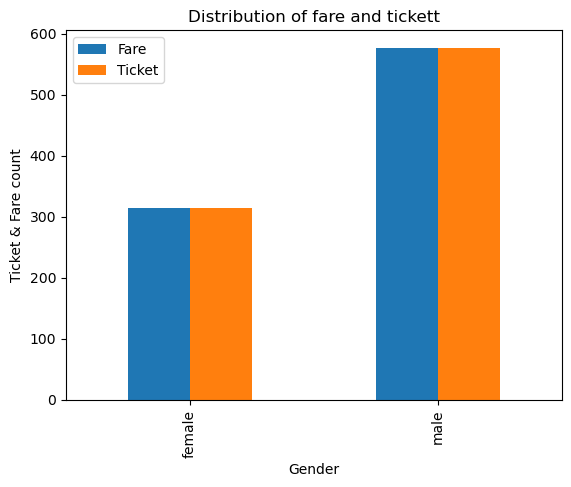

In [53]:
pivot.plot(kind="bar")
plt.title('Distribution of fare and tickett')
plt.xlabel('Gender')
plt.ylabel('Ticket & Fare count')
plt.show()

In [55]:
pivot_Pclass=df.pivot_table(index='Pclass', values='Survived',aggfunc='sum')
total_survived_age = pivot_Pclass['Survived'].sum()


In [56]:
pivot_Pclass['Survival Probability'] =(pivot_Pclass['Survived'] / total_survived_age)*100
pivot_Pclass = pivot_Pclass.reset_index()
pivot_Pclass

,Pclass,Survived,Survival Probability
0,1,136,39.766082
1,2,87,25.438596
2,3,119,34.795322


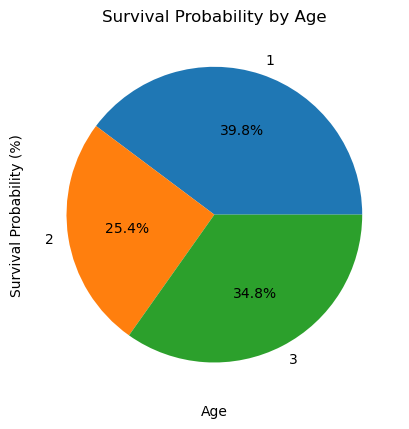

In [57]:
pivot_Pclass.set_index('Pclass')['Survival Probability'].plot(kind="pie", autopct='%1.1f%%', legend=False)
plt.title('Survival Probability by Age')
plt.xlabel('Age')
plt.ylabel('Survival Probability (%)')
plt.show()